In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
df = pd.read_csv("train_data.csv")
df.head() 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


# **Data Preprocessing**

In [3]:
# Removing booking_id column
df.drop(columns = ["Booking_ID"], inplace = True)
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
# Shape of the data frame
df.shape

(29020, 18)

In [5]:
# Check for null 
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
# Check for duplicate values
df.duplicated().sum()

np.int64(7661)

In [15]:
# Droping duplicate values
df.drop_duplicates(inplace = True)

In [ ]:
# new shape of the dataframe
df.shape

(21359, 18)

# **Exploratory data analysis**

In [6]:
# checking no of adults bookings
df["no_of_adults"].value_counts()

no_of_adults
2    20896
1     6154
3     1841
0      116
4       13
Name: count, dtype: int64

In [7]:
# Checking the children bookings
df["no_of_children"].value_counts()                  # Mostly booked by coupled

no_of_children
0     26837
1      1315
2       853
3        12
9         2
10        1
Name: count, dtype: int64

In [8]:
# Chgeckin for type of meal plan and most popular one
df["type_of_meal_plan"].value_counts() 

type_of_meal_plan
Meal Plan 1     22274
Not Selected     4085
Meal Plan 2      2657
Meal Plan 3         4
Name: count, dtype: int64

In [9]:
# Checking how many men go for car parking space
df["required_car_parking_space"].value_counts() 

required_car_parking_space
0    28093
1      927
Name: count, dtype: int64

In [10]:
# Checking for most popular room type
df["room_type_reserved"].value_counts()

room_type_reserved
Room_Type 1    22489
Room_Type 4     4841
Room_Type 6      773
Room_Type 2      567
Room_Type 5      214
Room_Type 7      131
Room_Type 3        5
Name: count, dtype: int64

In [11]:
# Checking for the crowd on monthly basis
df["arrival_month"].value_counts()

arrival_month
10    4263
9     3704
8     3038
6     2589
11    2377
7     2367
12    2360
4     2211
5     2089
3     1857
2     1362
1      803
Name: count, dtype: int64

In [12]:
# Checking for most popular booking option
df["market_segment_type"].value_counts()

market_segment_type
Online           18550
Offline           8430
Corporate         1632
Complementary      312
Aviation            96
Name: count, dtype: int64

In [13]:
# Checking for repeted customers
df["repeated_guest"].value_counts()

repeated_guest
0    28272
1      748
Name: count, dtype: int64

In [14]:
# Checking for cancellations
df["no_of_previous_cancellations"].value_counts()

no_of_previous_cancellations
0     28747
1       161
2        36
3        32
11       20
5        10
4         9
13        4
6         1
Name: count, dtype: int64

In [15]:
# Checking for booking status
df["booking_status"].value_counts()

booking_status
Not_Canceled    19551
Canceled         9469
Name: count, dtype: int64

In [16]:
# Dividing the columns to categorical and numerical columns
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 
            'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_previous_cancellations',
            'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month','arrival_date', 
            'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
            'avg_price_per_room', 'no_of_special_requests']

### **Univariate Analysis**

In [17]:
# Creating a copy so that original data remains unchanged
data = df.copy()

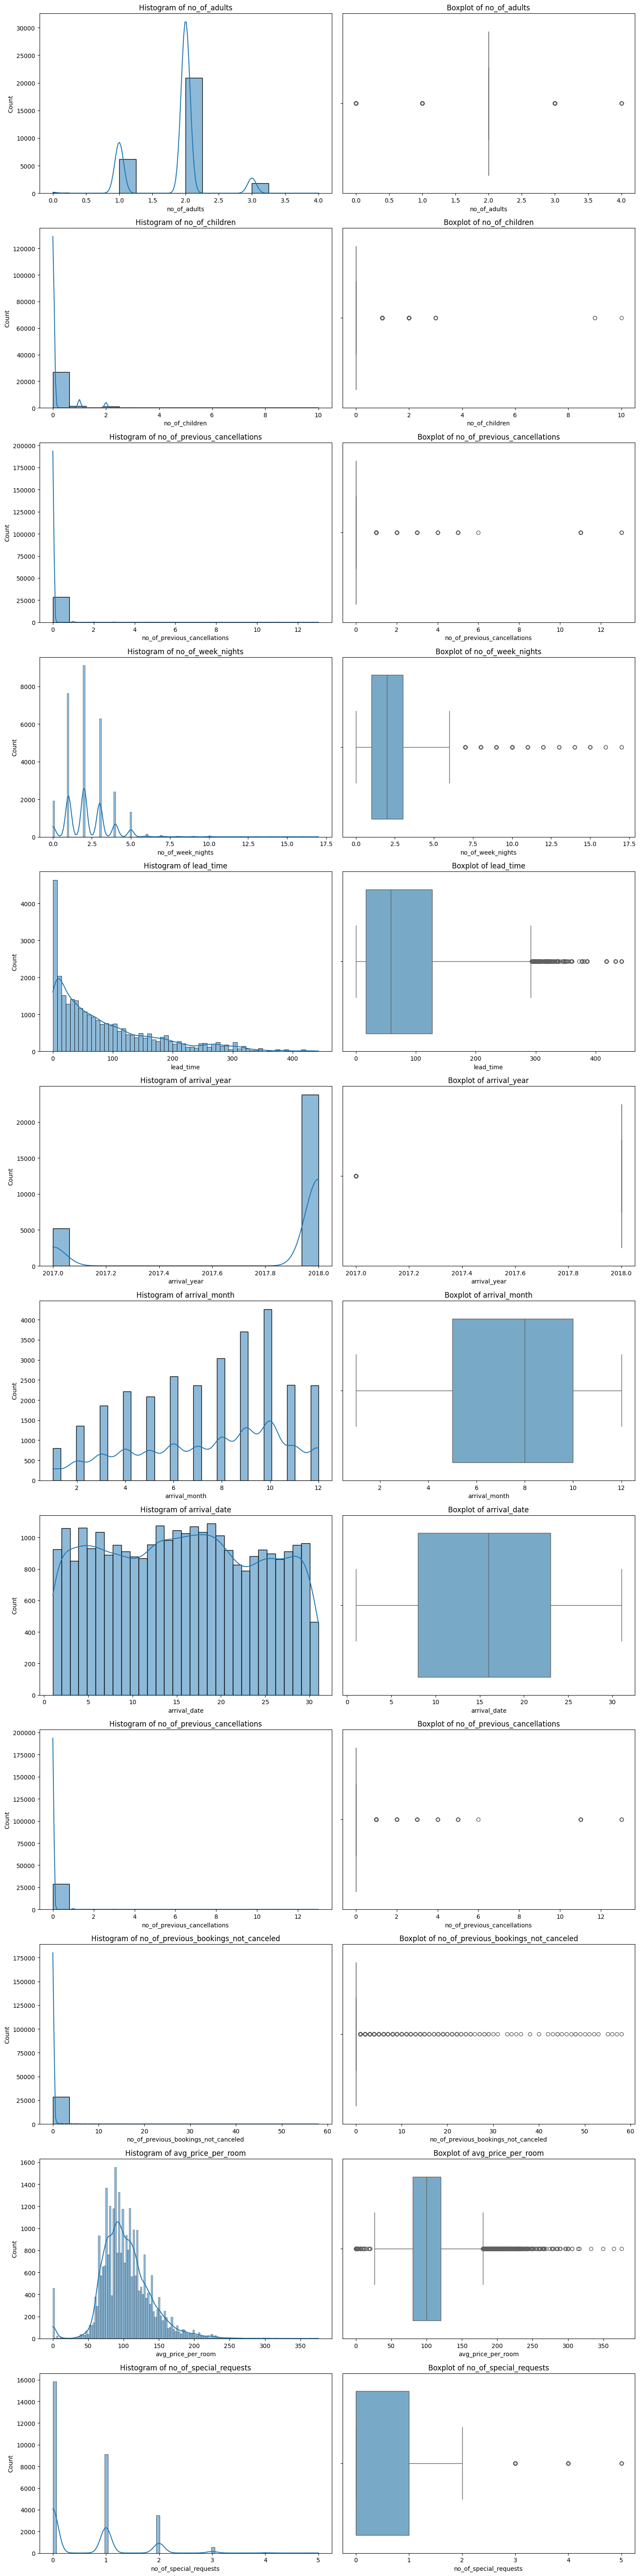

In [18]:
# ploting
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]
        
    for i, column in enumerate(num_features):
        sns.histplot(data = df, kde = True, x = column, ax = axes[i][0], palette = "Blues") 
        axes[i][0].set_title(f'Histogram of {column}') 
        
        sns.boxplot(data = df, x = column, ax=axes[i][1], palette = "Blues")
        axes[i][1].set_title(f'Boxplot of {column}')
        
    plt.tight_layout()
    plt.show()
    
num_plot_dist(data, num_cols)

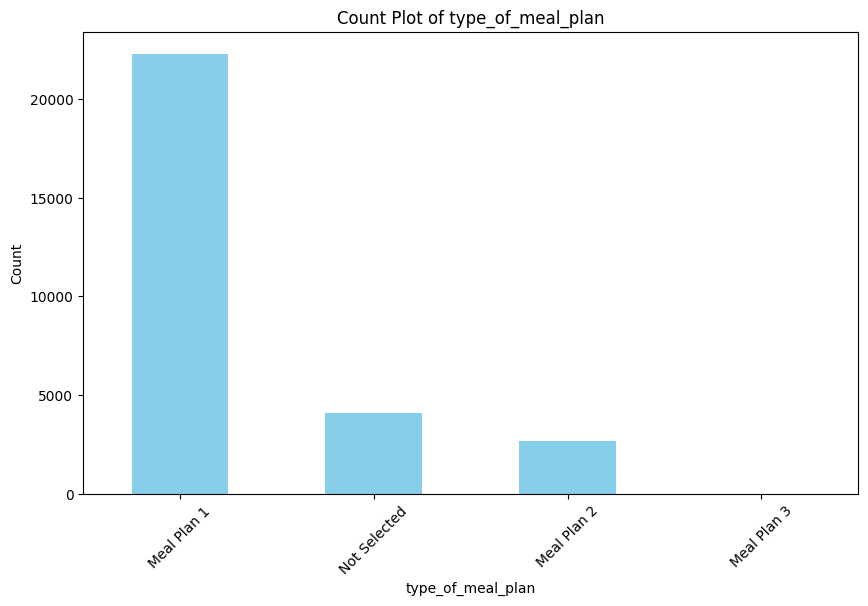

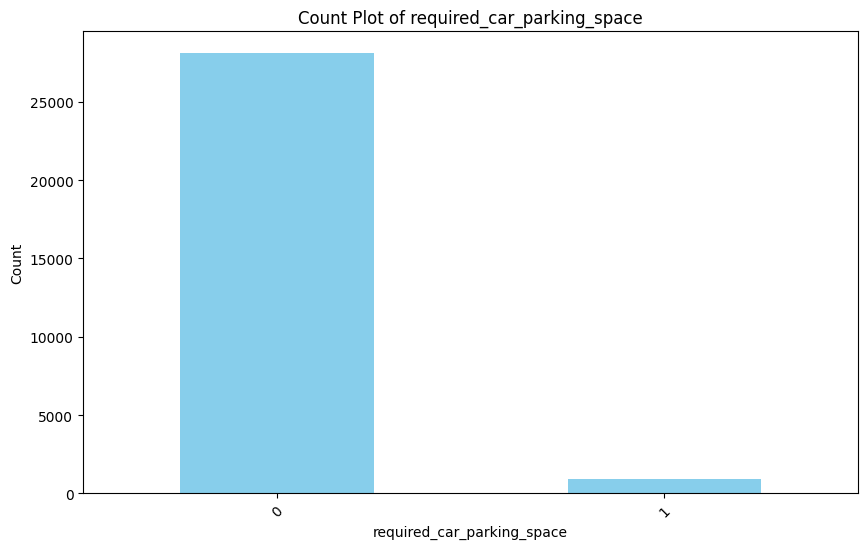

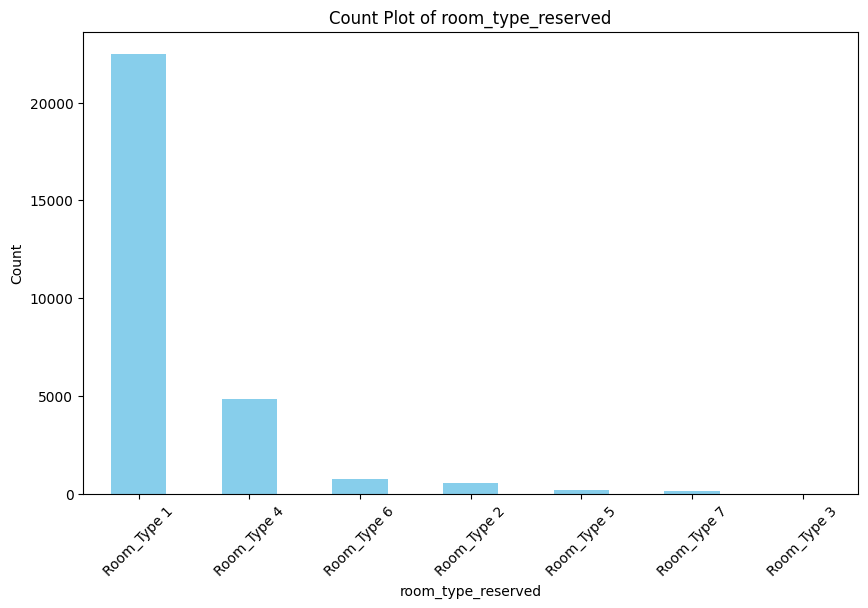

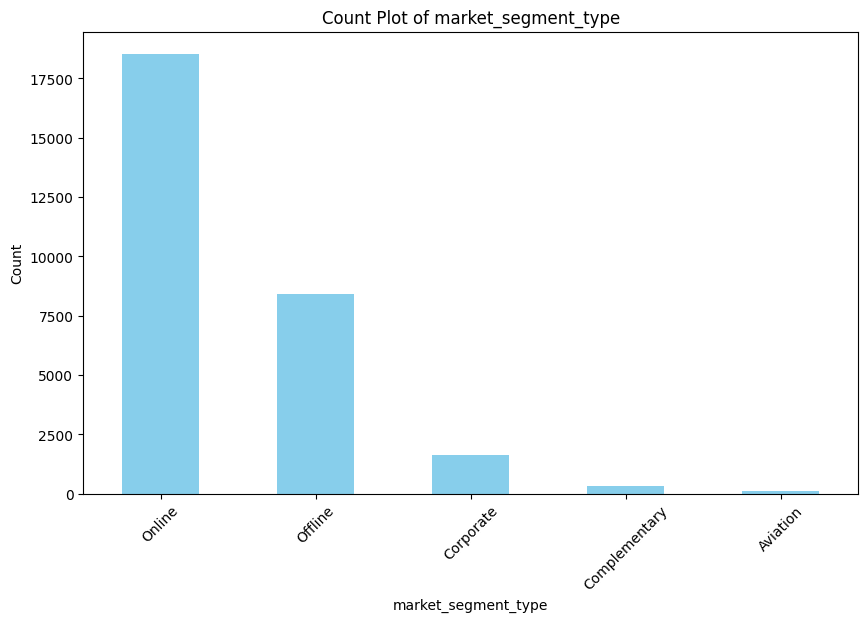

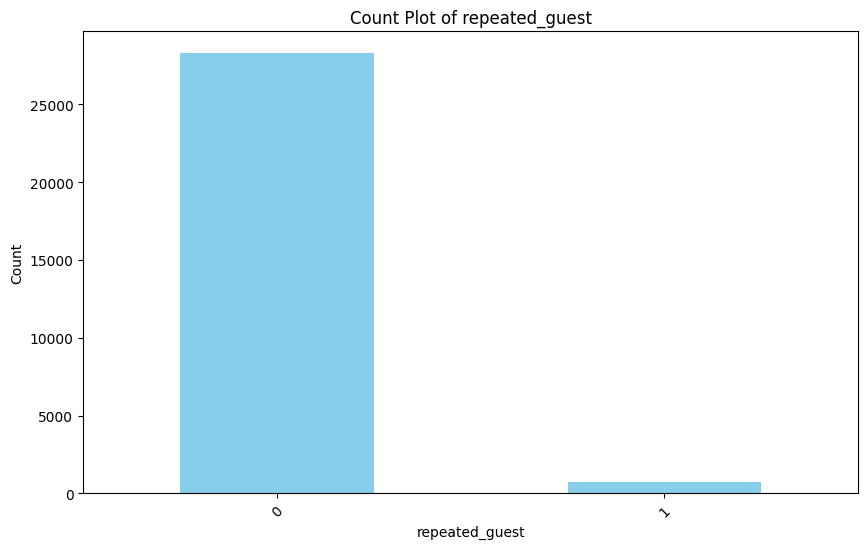

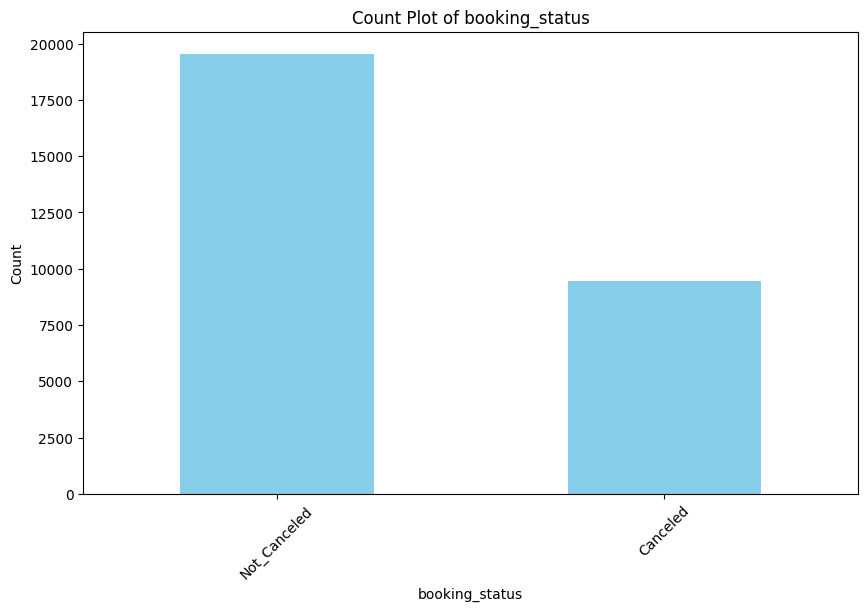

In [19]:
# For cat columns
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Count Plot of {cat_feature}')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### **Bivariate Analysis**

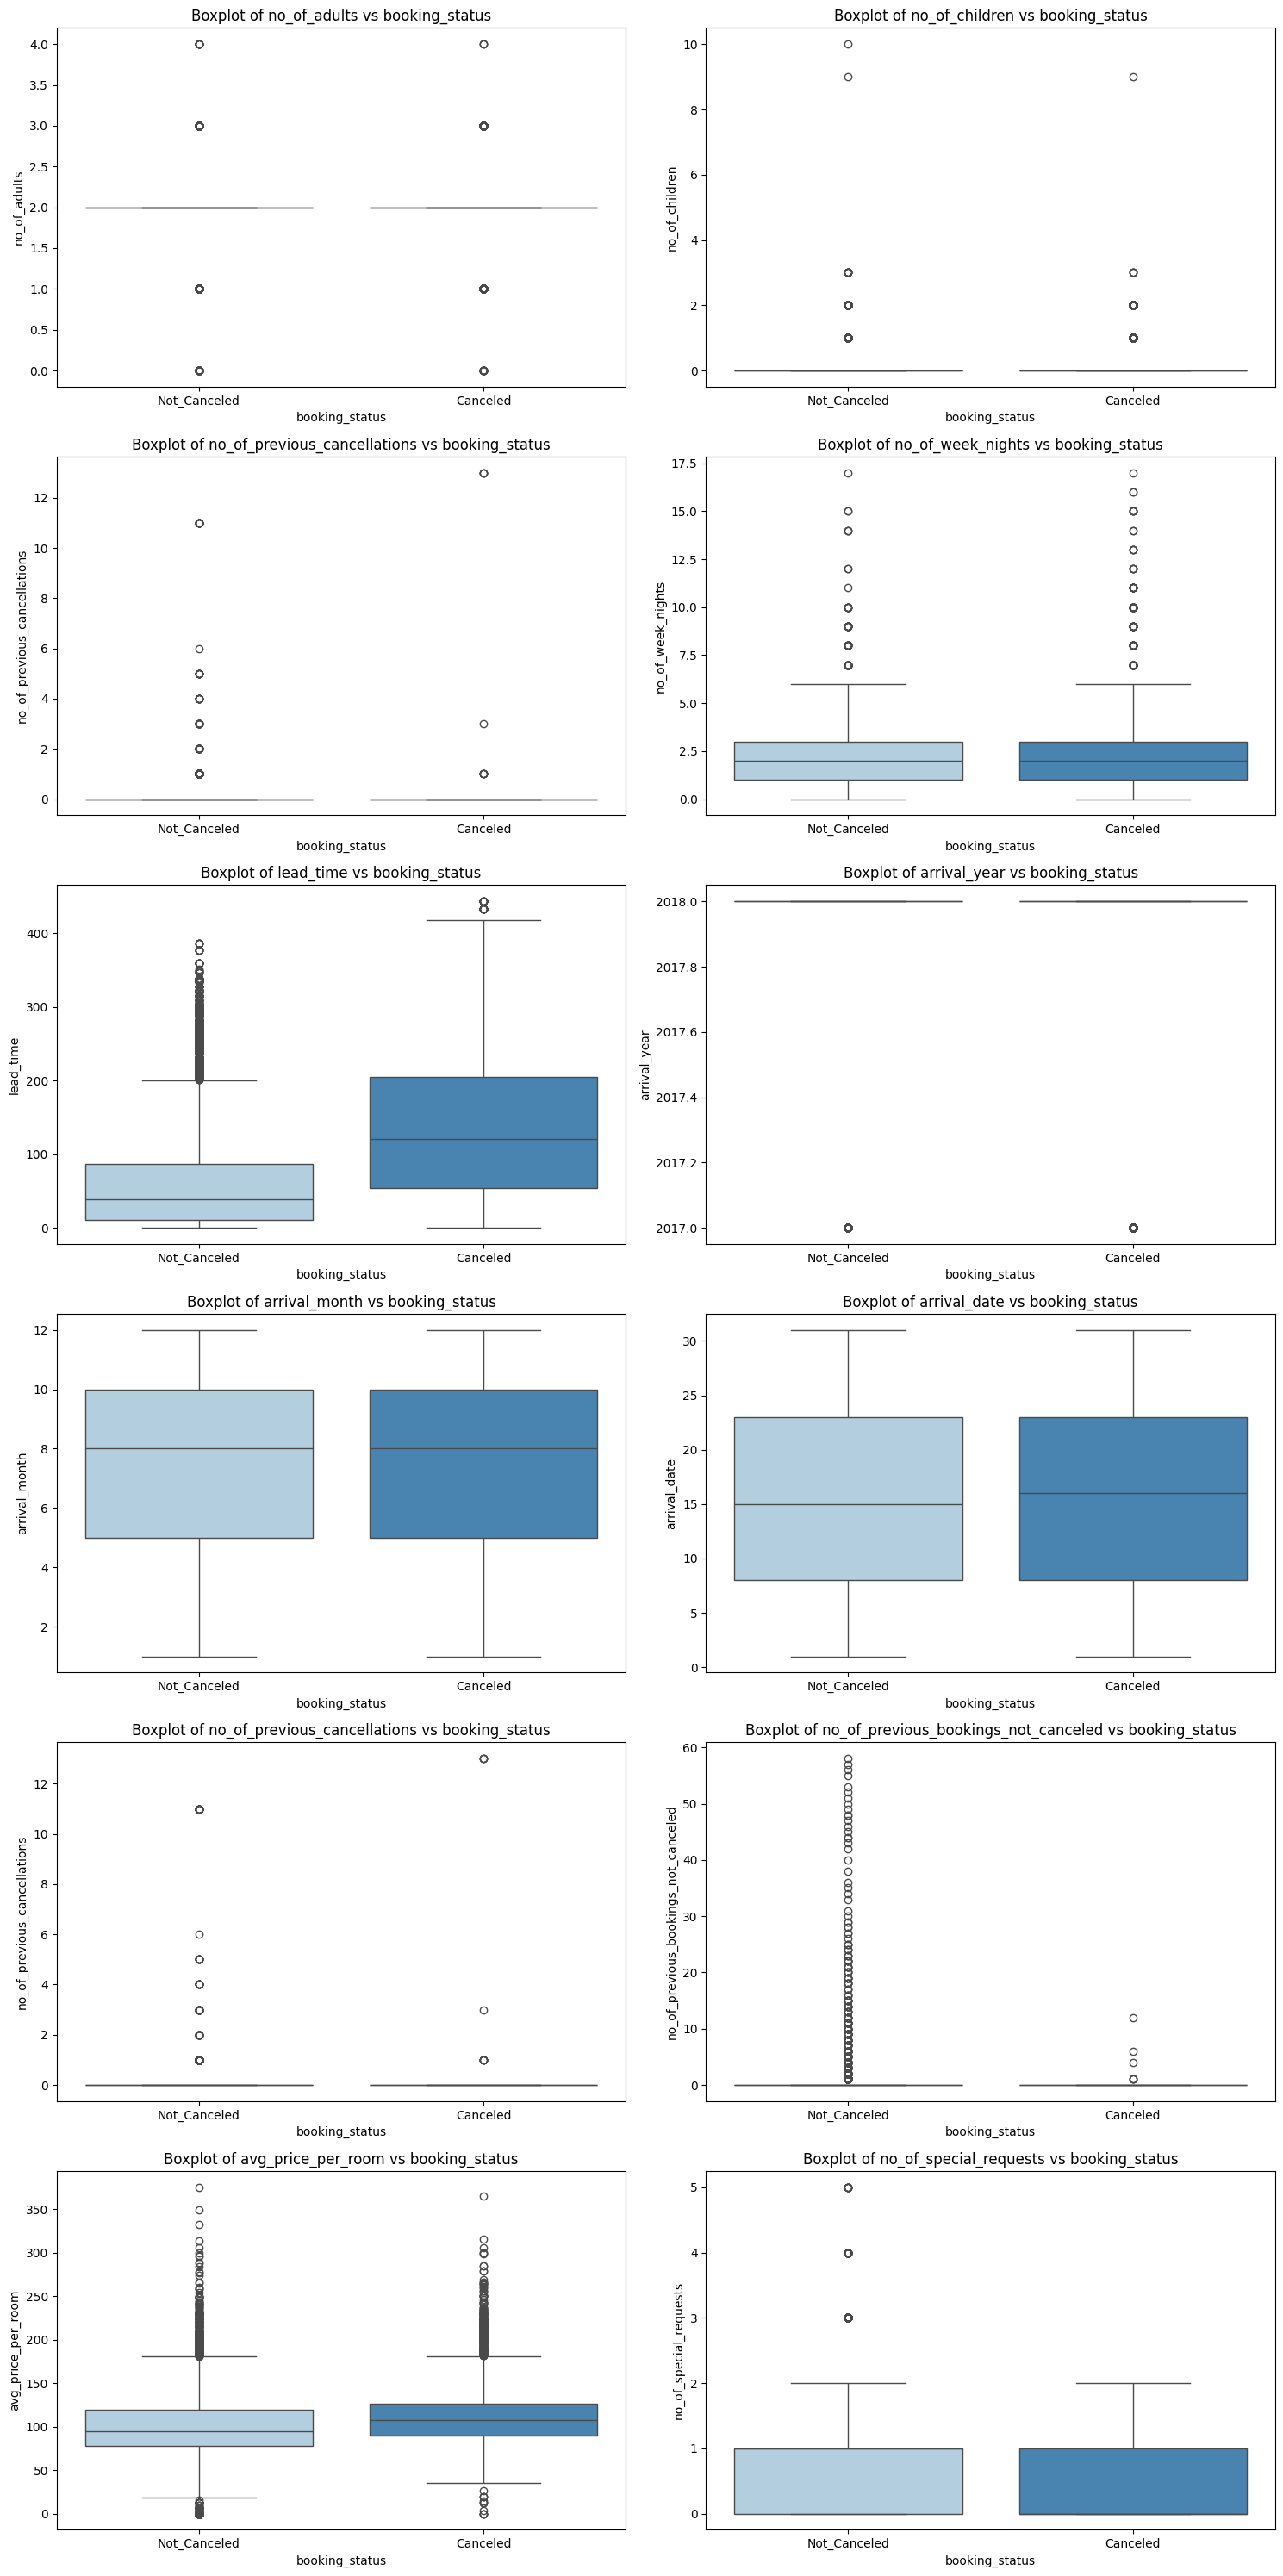

In [20]:
def plot_bivariate_num(df, target, num_features):
    num_plot = len(num_features)
    num_rows = (num_plot + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()
    for i, column in enumerate(num_features):
        sns.boxplot(data=df, x=target, y=column, ax=axes[i], palette="Blues")
        axes[i].set_title(f'Boxplot of {column} vs {target}')
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(column)
        
    plt.tight_layout()
    plt.show()
    
plot_bivariate_num(data, 'booking_status', num_cols) 

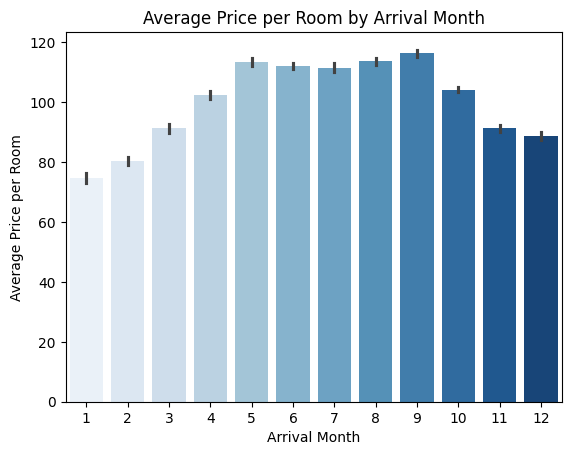

In [21]:
# arrival month VS avg price per room 
sns.barplot(data=data, x='arrival_month', y='avg_price_per_room', palette='Blues')
plt.title('Average Price per Room by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Average Price per Room')    
plt.show()

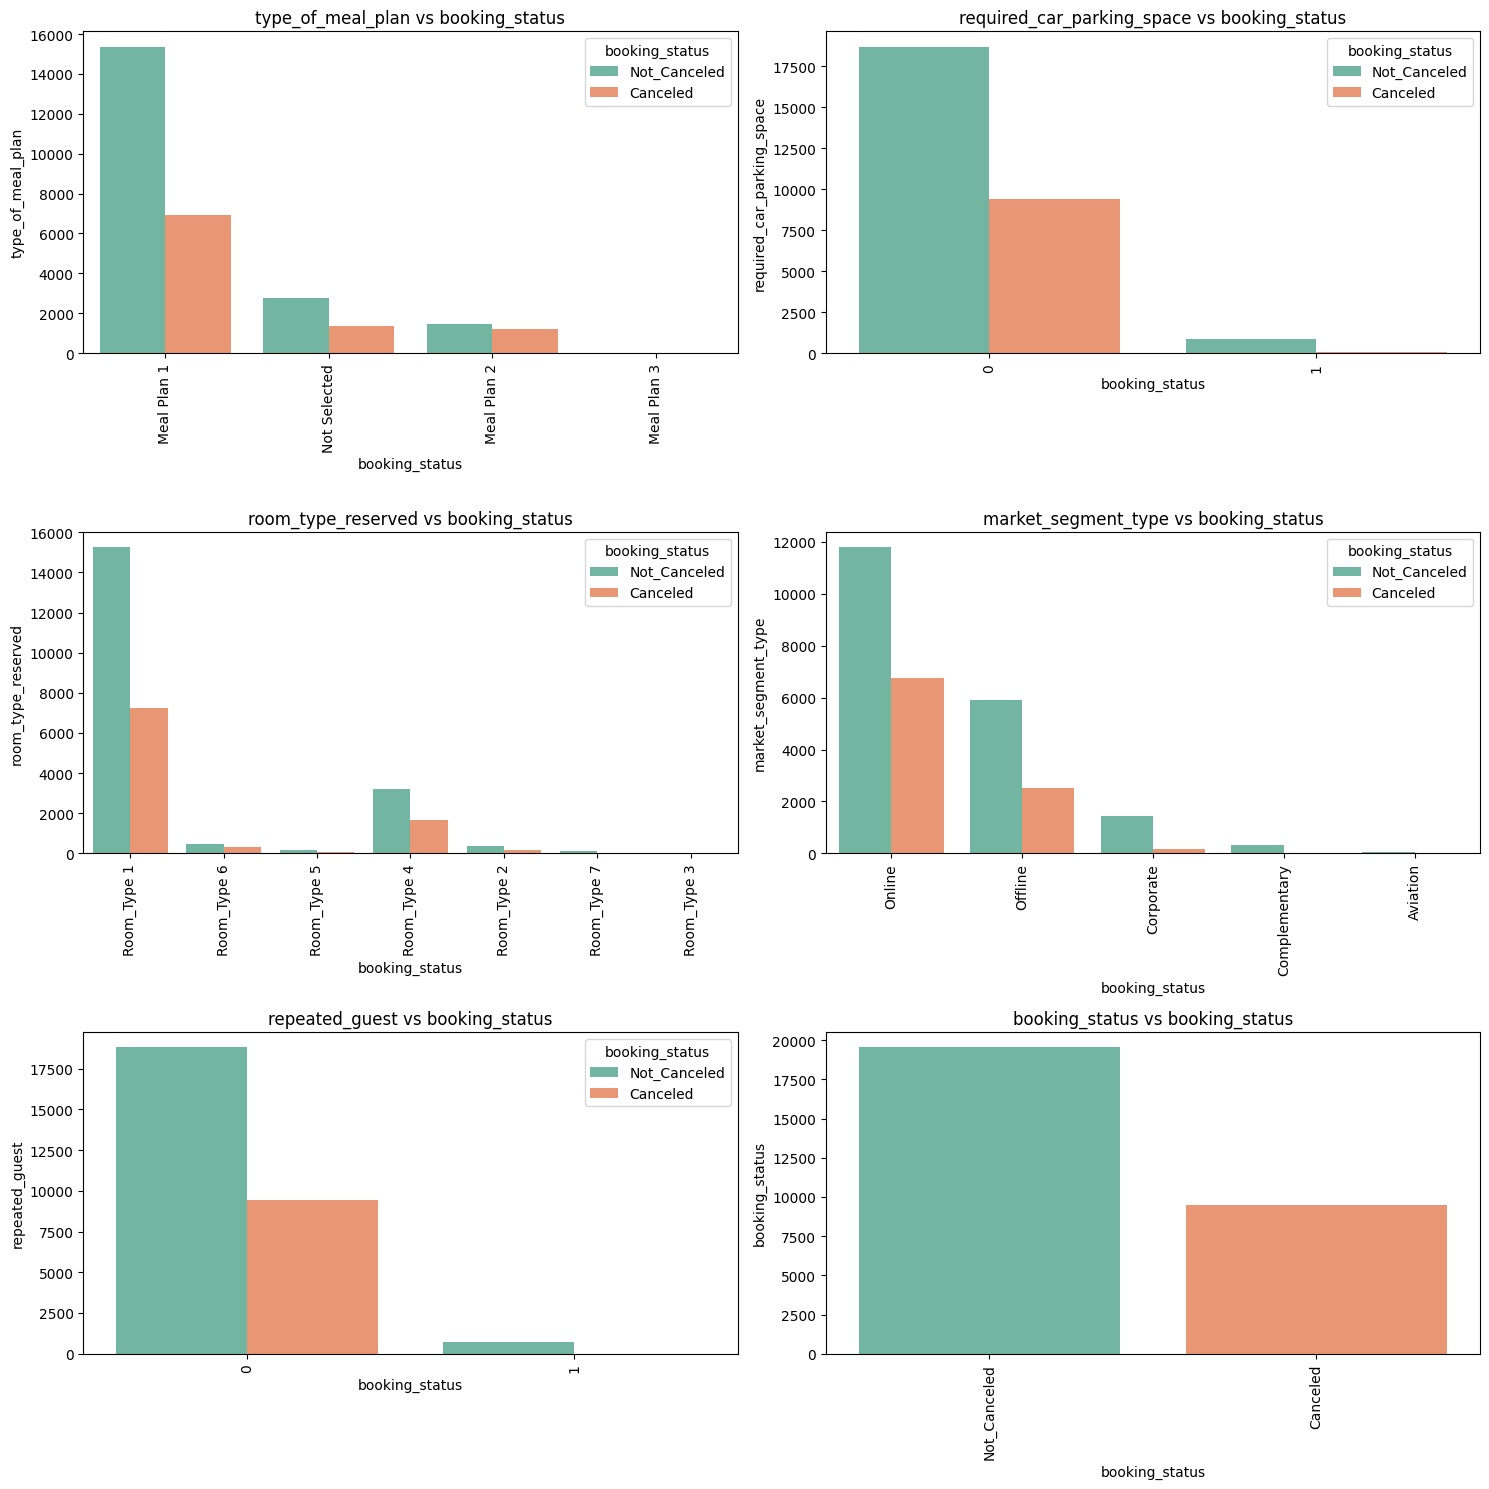

In [22]:
def plot_bivariate_cat(df, target, cat_features):
    num_plot = len(cat_features)
    num_rows = (num_plot + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()
    for i, column in enumerate(cat_features):
        sns.countplot(data=df, hue=target, x=column, ax=axes[i], palette="Set2")
        axes[i].set_title(f'{column} vs {target}')
        axes[i].tick_params(axis='x', rotation=90)
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(column)
        
    plt.tight_layout()
    plt.show()
    
plot_bivariate_cat(data, 'booking_status', cat_cols) 

# **Featured Engineering**

In [23]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [24]:
# Using Label Encoding to convert categorical columns to numerical
from sklearn.preprocessing import LabelEncoder  

label_encoder = LabelEncoder()
mappings = {}
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [25]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [26]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  int64  
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  int64  
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [28]:
# Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data 

,Feature,VIF
0,const,3.585767e+07
1,no_of_adults,1.295419e+00
2,no_of_children,1.257749e+00
3,no_of_weekend_nights,1.062324e+00
4,no_of_week_nights,1.086849e+00
5,type_of_meal_plan,1.155976e+00
6,required_car_parking_space,1.036866e+00
7,room_type_reserved,1.530014e+00
8,lead_time,1.440424e+00
9,arrival_year,1.297431e+00


 since all the nos are > 5 so they dont have any multi-co-linearity

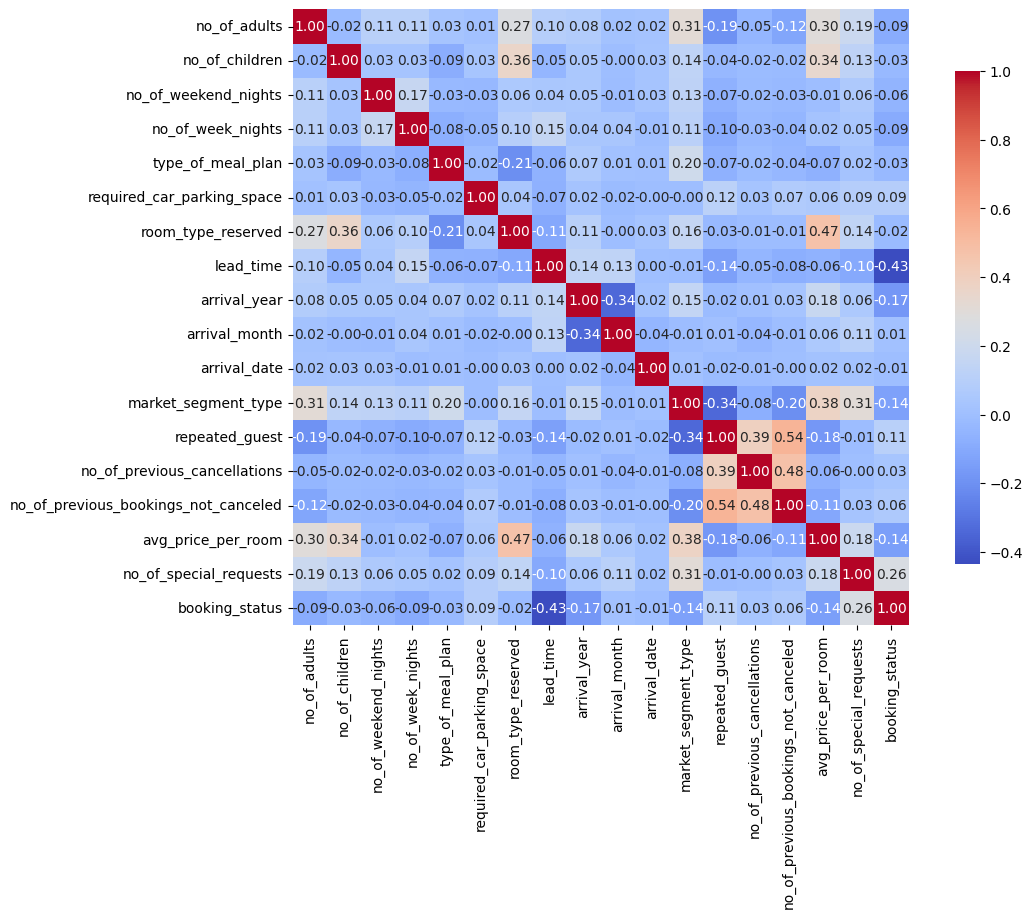

In [29]:
# Plotting co-relation heatmap 
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}) 
plt.show()

In [30]:
# Checking for sklewness
skewness = df.skew()
skewness

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            24.940984
no_of_previous_bookings_not_canceled    19.509733
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [ ]:
# Handling the skewness by log transformation
for col in df.columns:
    if abs(skewness[col]) > 5:  # threshold for skewness
        df[col] = np.log1p(df[col])  # log transformation

In [32]:
skewness = df.skew()
skewness

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            14.550045
no_of_previous_bookings_not_canceled     8.897196
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

### **SMOTE - for handling imbalanced data**

In [33]:
# Handling Imbalanced data
df['booking_status'].value_counts() 

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [ ]:
# Split the data
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
y_res.value_counts()

booking_status
1    19551
0    19551
Name: count, dtype: int64

In [49]:
# Creating new dataframe with resampled value
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0.0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0.0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0.0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0.0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0.0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [50]:
print(balanced_df.shape)

# Creating copy 
df = balanced_df.copy() 


(39102, 18)


### **Feature selection**
There are total 19 feature in the dataframe and sending all of them for model training will result redundancy

In [51]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['booking_status'])
y = df['booking_status']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y) 

RandomForestClassifier(random_state=42)

In [52]:
Feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': Feature_importance
})

In [54]:
top_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_feature_importance_df

,Feature,Importance
7,lead_time,0.302429
15,avg_price_per_room,0.151745
16,no_of_special_requests,0.141229
9,arrival_month,0.086331
10,arrival_date,0.082168
11,market_segment_type,0.055566
3,no_of_week_nights,0.044694
2,no_of_weekend_nights,0.032269
8,arrival_year,0.023004
0,no_of_adults,0.021525


In [55]:
top_10_features = top_feature_importance_df["Feature"].head(10).values 
top_10_features

array(['lead_time', 'avg_price_per_room', 'no_of_special_requests',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'arrival_year',
       'no_of_adults'], dtype=object)

In [56]:
top_10_df = df[top_10_features.tolist() + ['booking_status']]
top_10_df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,26,161.00,0,10,17,4,1,2,2017,2,1
1,98,121.50,2,7,16,4,1,1,2018,2,1
2,433,70.00,0,9,8,3,3,0,2018,2,0
3,195,72.25,0,8,8,3,5,2,2018,2,1
4,188,130.00,0,6,15,3,2,0,2018,1,0


In [57]:
df = top_10_df.copy() 

# **Model Selection**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [60]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initializing all the classifiers

classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVC': SVC(kernel='linear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [62]:
# initialize all the metrics

metrics = {
    'Model' : [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [63]:
for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 15649, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 31281, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500272 -> initscore=0.001087
[LightGBM] [Info] Start training from score 0.001087


In [64]:
# Creating a dataframe for the matrics
metrics_df = pd.DataFrame(metrics)
metrics_df 

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.914333,0.909944,0.919272,0.914584
1,Gradient Boosting,0.841452,0.844283,0.836494,0.840371
2,AdaBoost,0.803734,0.803228,0.803434,0.803331
3,Logistic Regression,0.797213,0.806674,0.780625,0.793436
4,SVC,0.783020,0.754091,0.838544,0.794078
5,Decision Tree,0.881984,0.884189,0.878524,0.881347
6,Naive Bayes,0.755019,0.775527,0.716299,0.744738
7,K-Nearest Neighbors,0.832119,0.857498,0.795746,0.825469
8,XGBoost,0.896944,0.895100,0.898770,0.896931
9,LightGBM,0.887610,0.881403,0.895182,0.888239


so, among all the classifiers Random Firest performed well so we will be moving forward with it, hyperparameter tuning

### **Train our RandomForest Model**

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = df.drop(columns=['booking_status'])
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

In [68]:
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist,
    n_iter=5, 
    cv=5, 
    verbose=2, 
    random_state=42, 
    scoring='accuracy'
)

In [69]:
random_search.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  14.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  16.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  10.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  10.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  12.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  18.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  19.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  20.7s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014E352A3610>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014E3529F820>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014E352A3890>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014E352D8590>},
                   random_state=42, scoring='accuracy', verbose=2)

In [70]:
random_search.best_params_ 

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [71]:
best_rf_model = random_search.best_estimator_

In [72]:
y_pred = best_rf_model.predict(X_test)

# Metrics for the best model
accuracy = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [73]:
print(f"Best Random Forest Model Metrics:\n"
      f"Accuracy: {accuracy:.4f}\n"
      f"Precision: {precision_score:.4f}\n"
      f"Recall: {recall_score:.4f}\n"
      f"F1 Score: {f1_score:.4f}")

Best Random Forest Model Metrics:
Accuracy: 0.9113
Precision: 0.9051
Recall: 0.9185
F1 Score: 0.9117


# **Saving the model**

In [74]:
import joblib

joblib.dump(best_rf_model, 'random_forest.pkl') 

['random_forest.pkl']

# **Loading the model**

In [75]:
X_train[0:1]

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults
3047,47,91.8,0,3,10,4,3,0,2018,2


In [77]:
loaded_model = joblib.load('random_forest.pkl') 

## How to use the model for prediction
new_data = np.array([47, 91.8, 0, 3, 10, 4, 3, 0, 2018, 2]).reshape(1, -1) 
prediction = loaded_model.predict(new_data) 
prediction

array([0])

In actual model training we will not use RF or XGB because of high size 150MB, we will be using LGB accuracy difference is just 3-5% that can also be reduced by hyperparameter tuning